In [1]:
df<- read.csv("/content/train.csv")

In [2]:
head(df)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1000001,P00069042,F,0-17,10,A,2,0,3,NA,NA,8370
2,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
3,1000001,P00087842,F,0-17,10,A,2,0,12,NA,NA,1422
4,1000001,P00085442,F,0-17,10,A,2,0,12,14,NA,1057
5,1000002,P00285442,M,55+,16,C,4+,0,8,NA,NA,7969
6,1000003,P00193542,M,26-35,15,A,3,0,1,2,NA,15227


In [61]:
dim(df)

[1] 550068     15

In [4]:
summary(df)

    User_ID         Product_ID           Gender              Age           
 Min.   :1000001   Length:550068      Length:550068      Length:550068     
 1st Qu.:1001516   Class :character   Class :character   Class :character  
 Median :1003077   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1003029                                                           
 3rd Qu.:1004478                                                           
 Max.   :1006040                                                           
                                                                           
   Occupation     City_Category      Stay_In_Current_City_Years
 Min.   : 0.000   Length:550068      Length:550068             
 1st Qu.: 2.000   Class :character   Class :character          
 Median : 7.000   Mode  :character   Mode  :character          
 Mean   : 8.077                                                
 3rd Qu.:14.000                                                
 Max.   

In [5]:
install.packages("Hmisc",repos = "http://cran.us.r-project.org")
library(Hmisc)
describe(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




df 

 12  Variables      550068  Observations
--------------------------------------------------------------------------------
User_ID 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  550068        0     5891        1  1003029     1994  1000329  1000670 
     .25      .50      .75      .90      .95 
 1001516  1003077  1004478  1005446  1005747 

lowest : 1000001 1000002 1000003 1000004 1000005
highest: 1006036 1006037 1006038 1006039 1006040
--------------------------------------------------------------------------------
Product_ID 
       n  missing distinct 
  550068        0     3631 

lowest : P00000142 P00000242 P00000342 P00000442 P00000542
highest: P0099442  P0099642  P0099742  P0099842  P0099942 
--------------------------------------------------------------------------------
Gender 
       n  missing distinct 
  550068        0        2 
                        
Value           F      M
Frequency  135809 414259
Proportion  0.247  0.753
--------------

Let’s First Find categorical and continuos variables in our training data set.

In [6]:
str(df)

'data.frame':	550068 obs. of  12 variables:
 $ User_ID                   : int  1000001 1000001 1000001 1000001 1000002 1000003 1000004 1000004 1000004 1000005 ...
 $ Product_ID                : chr  "P00069042" "P00248942" "P00087842" "P00085442" ...
 $ Gender                    : chr  "F" "F" "F" "F" ...
 $ Age                       : chr  "0-17" "0-17" "0-17" "0-17" ...
 $ Occupation                : int  10 10 10 10 16 15 7 7 7 20 ...
 $ City_Category             : chr  "A" "A" "A" "A" ...
 $ Stay_In_Current_City_Years: chr  "2" "2" "2" "2" ...
 $ Marital_Status            : int  0 0 0 0 0 0 1 1 1 1 ...
 $ Product_Category_1        : int  3 1 12 12 8 1 1 1 1 8 ...
 $ Product_Category_2        : int  NA 6 NA 14 NA 2 8 15 16 NA ...
 $ Product_Category_3        : int  NA 14 NA NA NA NA 17 NA NA NA ...
 $ Purchase                  : int  8370 15200 1422 1057 7969 15227 19215 15854 15686 7871 ...


In [7]:
#tapply(df$Gender,df$Purchase,mean,na,rm=T)

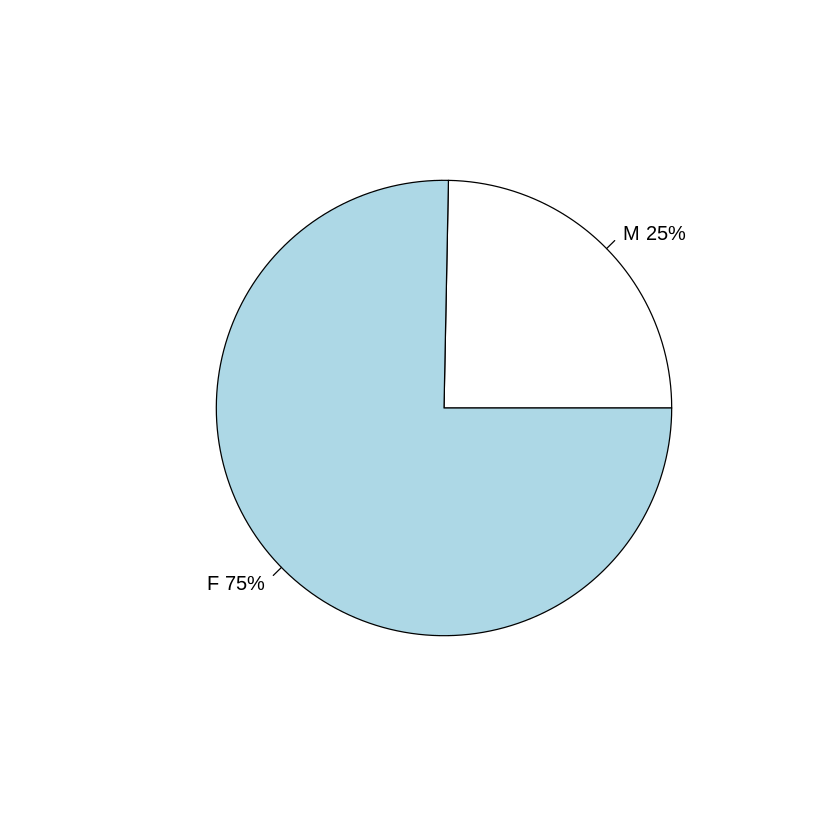

In [8]:
t<-table(df$Gender)
lbls <- c("M","F")
pct <- round(t/sum(t)*100)
lbls <- paste(lbls, pct) 
lbls <- paste(lbls,"%",sep="")
pie(t,labels = lbls)

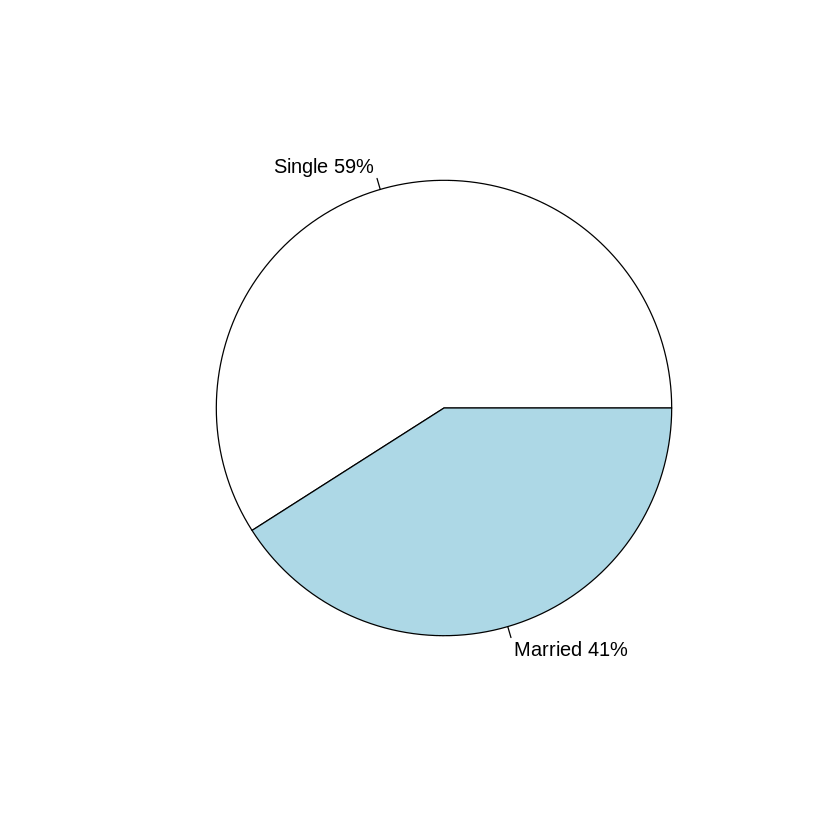

In [9]:
t<-table(df$Marital_Status)
lbls <- c("Single","Married")
pct <- round(t/sum(t)*100)
lbls <- paste(lbls, pct) 
lbls <- paste(lbls,"%",sep="")
pie(t,labels = lbls)

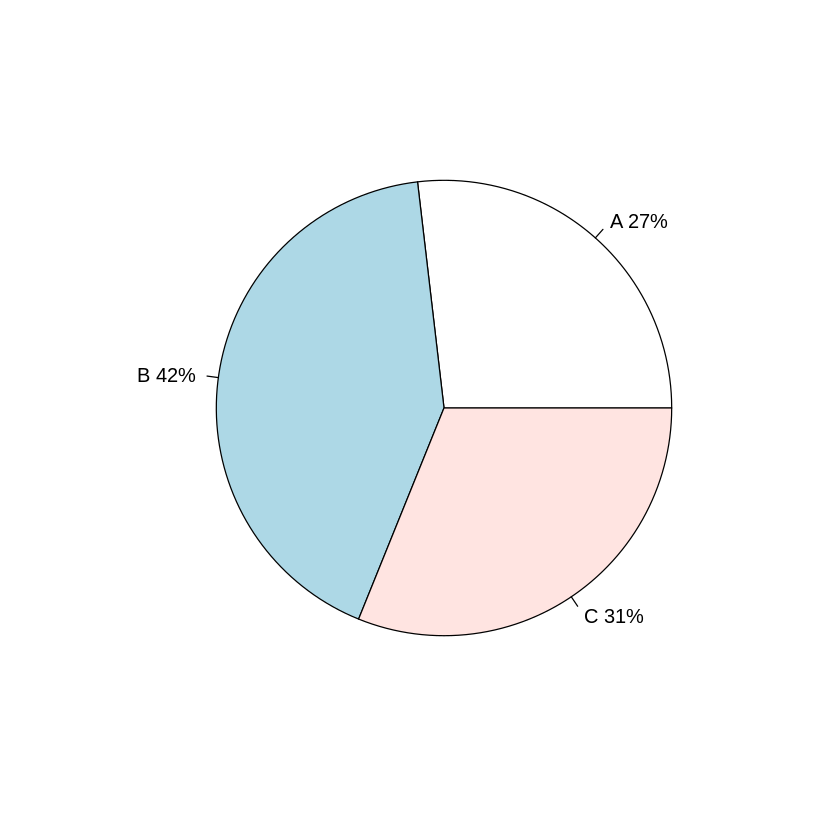

In [10]:
t<-table(df$City_Category)
lbls <- c("A","B","C")
pct <- round(t/sum(t)*100)
lbls <- paste(lbls, pct) 
lbls <- paste(lbls,"%",sep="")
pie(t,labels = lbls)

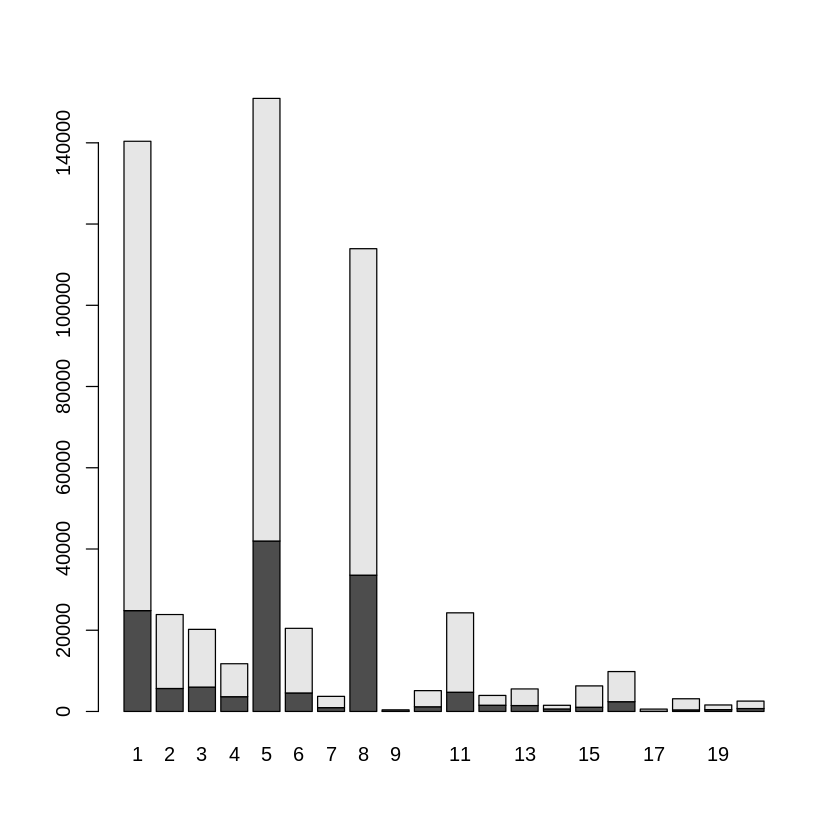

In [14]:
count <- table(df$Gender, df$Product_Category_1)
barplot(count)          

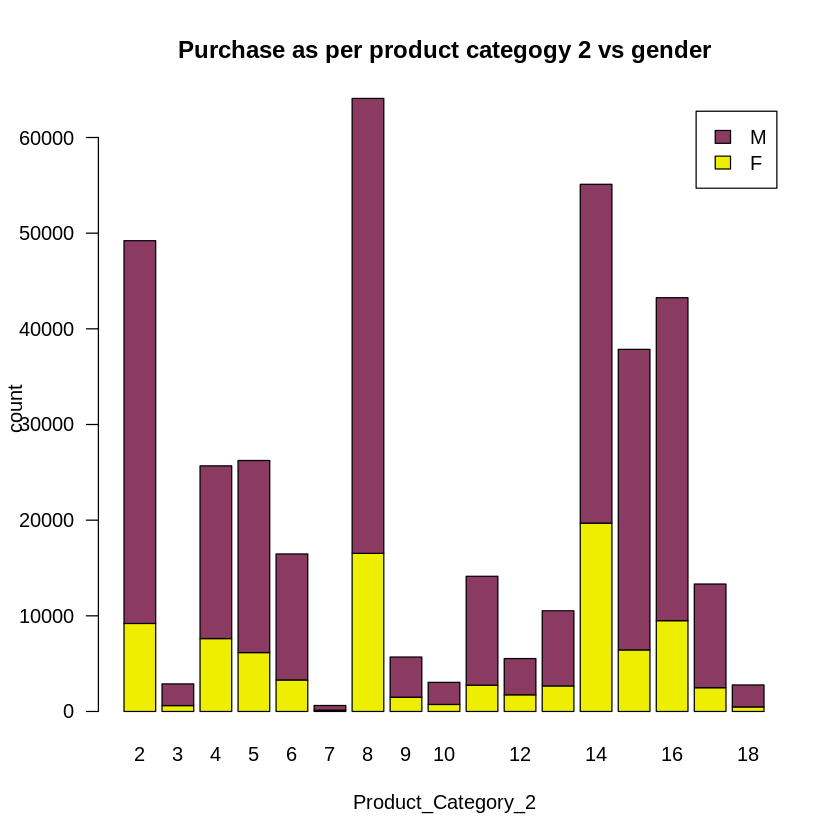

In [17]:
count <- table(df$Gender, df$Product_Category_2)
barplot(count,
        col = c("yellow2", "hotpink4"),
        legend.text = TRUE,
        main = "Purchase as per product categogy 2 vs gender",
        xlab = "Product_Category_2",
        ylab = "count",
        las = 1)         

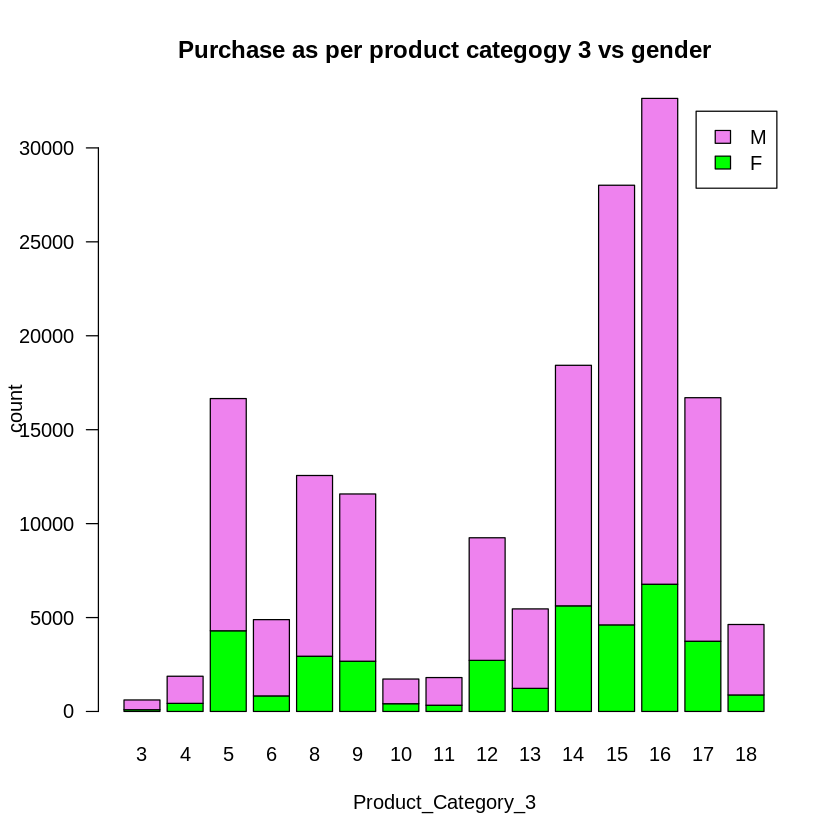

In [19]:
count <- table(df$Gender, df$Product_Category_3)
barplot(count,
        col = c("green", "violet"),
        legend.text = TRUE,
        main = "Purchase as per product categogy 3 vs gender",
        xlab = "Product_Category_3",
        ylab = "count",
        las = 1) 

In [22]:
xtabs(~Marital_Status+Gender,data=df)

              Gender
Marital_Status      F      M
             0  78821 245910
             1  56988 168349

In [24]:
xtabs(Purchase~Product_Category_3,aggregate(Purchase~Product_Category_3,df,mean))

Product_Category_3
        3         4         5         6         8         9        10        11 
13939.697  9794.387 12117.787 13194.311 13024.919 10431.697 13505.813 12091.438 
       12        13        14        15        16        17        18 
 8715.513 13185.119 10052.595 12339.370 11981.891 11769.943 10993.981 

In [26]:
xtabs(Purchase~Product_Category_2,aggregate(Purchase~Product_Category_2,df,mean))

Product_Category_2
        2         3         4         5         6         7         8         9 
13619.356 11235.360 10215.192  9027.822 11503.551  6884.684 10273.260  7277.007 
       10        11        12        13        14        15        16        17 
15648.730  8940.581  6975.473  9683.352  7105.265 10357.078 10295.682  9421.577 
       18 
 9352.440 

In [27]:
xtabs(Purchase~Product_Category_1,aggregate(Purchase~Product_Category_1,df,mean))

Product_Category_1
         1          2          3          4          5          6          7 
13606.2186 11251.9354 10096.7057  2329.6595  6240.0882 15838.4785 16365.6896 
         8          9         10         11         12         13         14 
 7498.9581 15537.3756 19675.5709  4685.2685  1350.8599   722.4006 13141.6257 
        15         16         17         18         19         20 
14780.4518 14766.0370 10170.7595  2972.8643    37.0418   370.4812 

## Unique Data For EDA & Data type modification
Since our data is stored based on product id i.e. if a person buying 10 products then his data will be stored in 10 observation and hence there will cause a repetition of same person data.

In [28]:
df$User_ID <- as.factor(df$User_ID)
df$Product_ID <- as.factor(df$Product_ID)
df$Marital_Status <- as.factor(ifelse(df$Marital_Status == 1, 'Married', 'Single'))
df$Age <- as.factor(df$Age)
df$Gender <- as.factor(ifelse(df$Gender=='M', 'Male', 'Female'))
df$Occupation <- as.factor(df$Occupation)
df$City_Category <- as.factor(df$City_Category)
df$Stay_In_Current_City_Years <- as.factor(df$Stay_In_Current_City_Years)

## User_ID
Creating new variables User_Purchase_Count, Total_Spending and Avg_Spending_on_each_Product

Total number of product purchased bu customer

In [30]:
#creating a new data frame to stor the number of purchase made by each user
userIDCount <- as.data.frame(table(df$User_ID))
names(userIDCount) <- c("User_ID","User_Purchase_Count")

#merging df
df <- merge(x = df, y = userIDCount, by = "User_ID", all.x = TRUE)

In [32]:
# creating a data frame to store the total spending by a user
totspend <- aggregate(df$Purchase, by=list(Category=df$User_ID), FUN=sum)
names(totspend) <- c("User_ID","Total_Spending")
df <- merge(x = df, y = totspend, by = "User_ID", all.x = TRUE)
#head(df)

## Average Spending on each product by a customer

Now calculating the average spending of user on each product we can divide Total_Spending by User_Purchase Count. Avg_Spending_on_each_Product = Total_Spending / User_Purchase_Count

In [34]:
df$Avg_Spending_on_each_Product <- df$Total_Spending / df$User_Purchase_Count

#Changing the datatype 
df$Avg_Spending_on_each_Product <- as.integer(df$Avg_Spending_on_each_Product)

In [35]:
summary(totspend$Total_Spending)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   46681   237678   521213   865017  1119250 10536909 

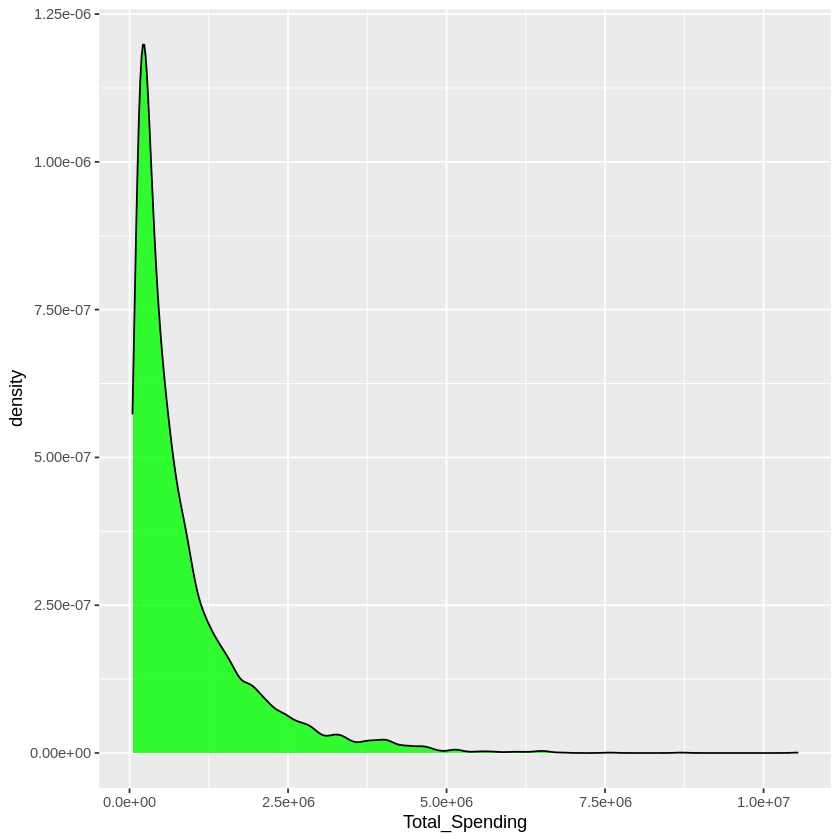

In [37]:
library(ggplot2)

ggplot(totspend, aes(x=Total_Spending)) + geom_density(fill="green", col="black", alpha=0.80)

In [38]:
#removing unwanted columns
rm(userIDCount, totspend)

Analysing using distict data

In [42]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [43]:
#Updating EDA_Distinct dataframe
EDA_Distinct <- distinct(df, User_ID, Age, Gender, Marital_Status, Occupation, City_Category, Stay_In_Current_City_Years, User_Purchase_Count)
d1 <- summary(EDA_Distinct$User_Purchase_Count)
d1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   26.00   54.00   93.37  117.00 1026.00 

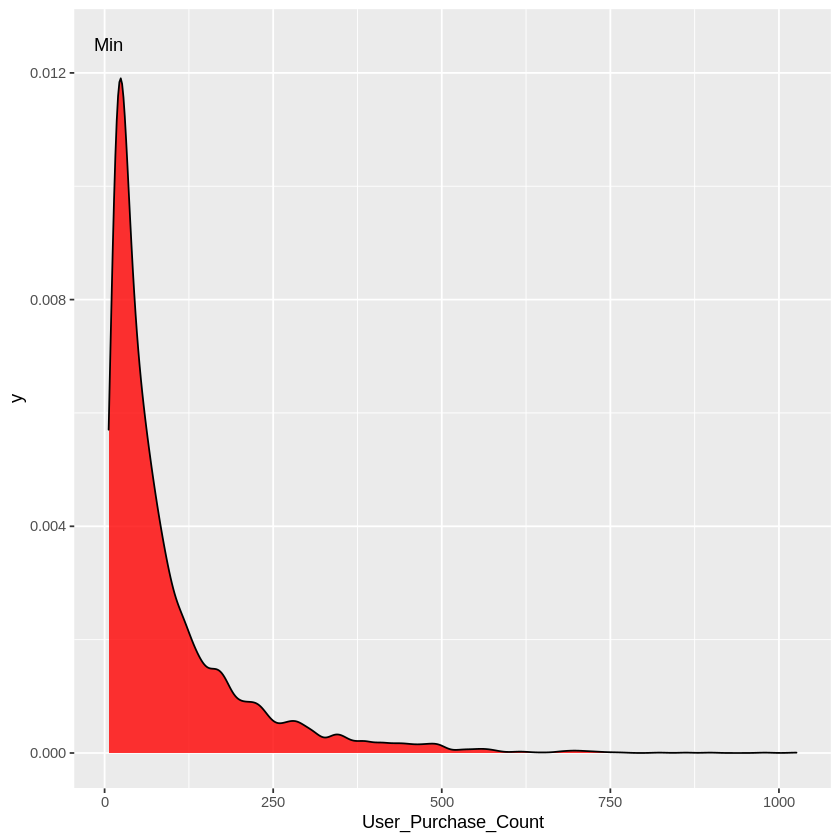

In [45]:
ggplot(EDA_Distinct, aes(x=User_Purchase_Count)) + geom_density(fill="red", col="black", alpha=0.80) + annotate(geom = "text", x = 6, y = 0.0125, label = "Min")

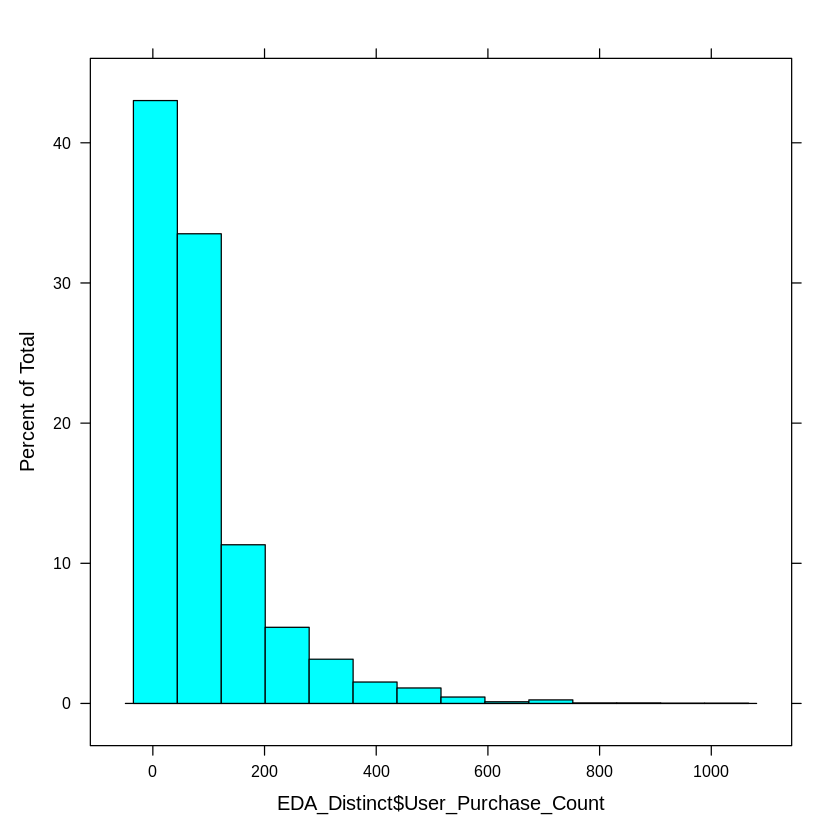

In [46]:
histogram(EDA_Distinct$User_Purchase_Count)

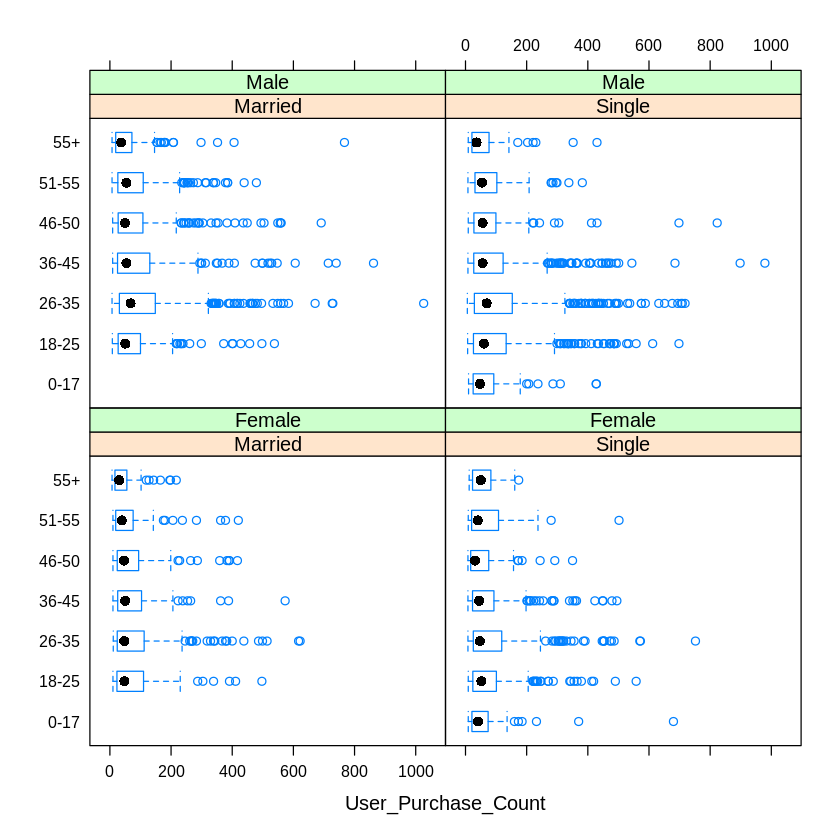

In [47]:
bwplot(Age~User_Purchase_Count|Marital_Status+Gender,data = EDA_Distinct)

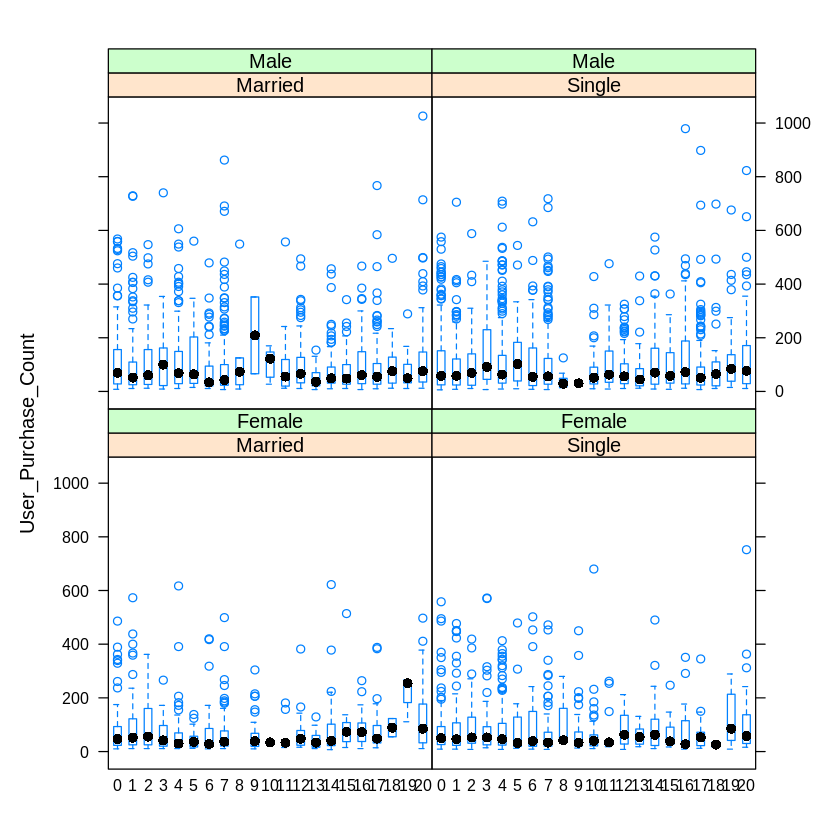

In [48]:
bwplot(User_Purchase_Count~Occupation|Marital_Status+Gender,data = EDA_Distinct)

## Product_id

Creating new variables Total number of product unit sold, Average price of a product, Sd of the product price

In [49]:
SoldProdCount <- as.data.frame(table(df$Product_ID))
names(SoldProdCount) <- c("Product_ID","Product_Sold_Count")

SoldProdPriceMean <- aggregate(df$Purchase, by=list(Category=df$Product_ID), FUN=mean)
names(SoldProdPriceMean) <- c("Product_ID","Product_Mean_Price")

SoldProdPriceSD <- aggregate(df$Purchase, by=list(Category=df$Product_ID), FUN=sd)
names(SoldProdPriceSD) <- c("Product_ID","Product_SD_Price")

In [50]:
summary(SoldProdCount$Product_Sold_Count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    19.5    71.0   151.5   194.0  1880.0 

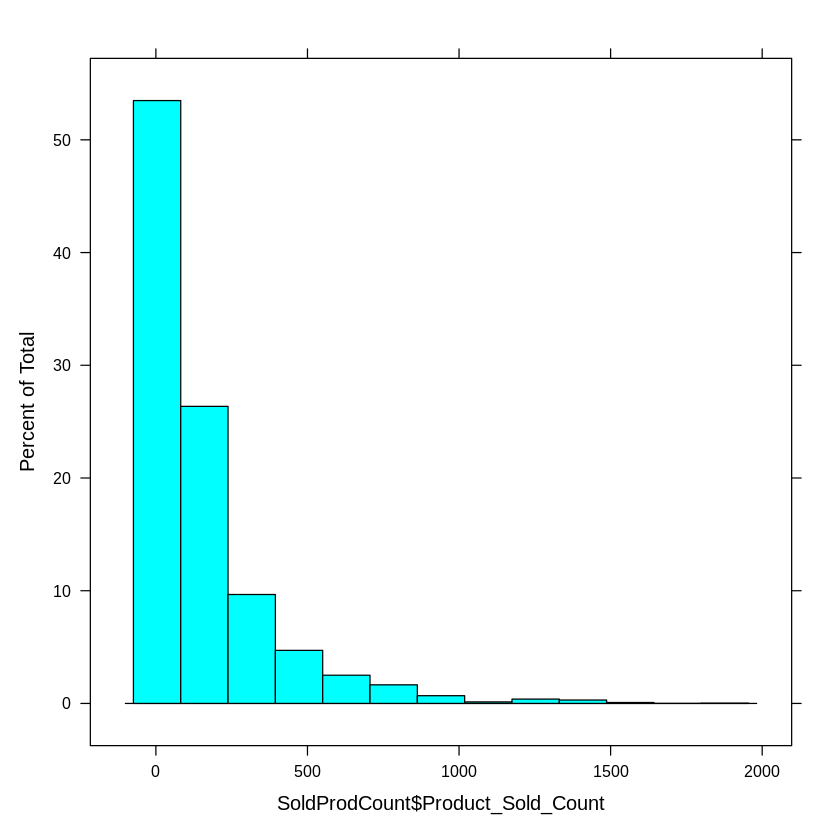

In [51]:
histogram(SoldProdCount$Product_Sold_Count)

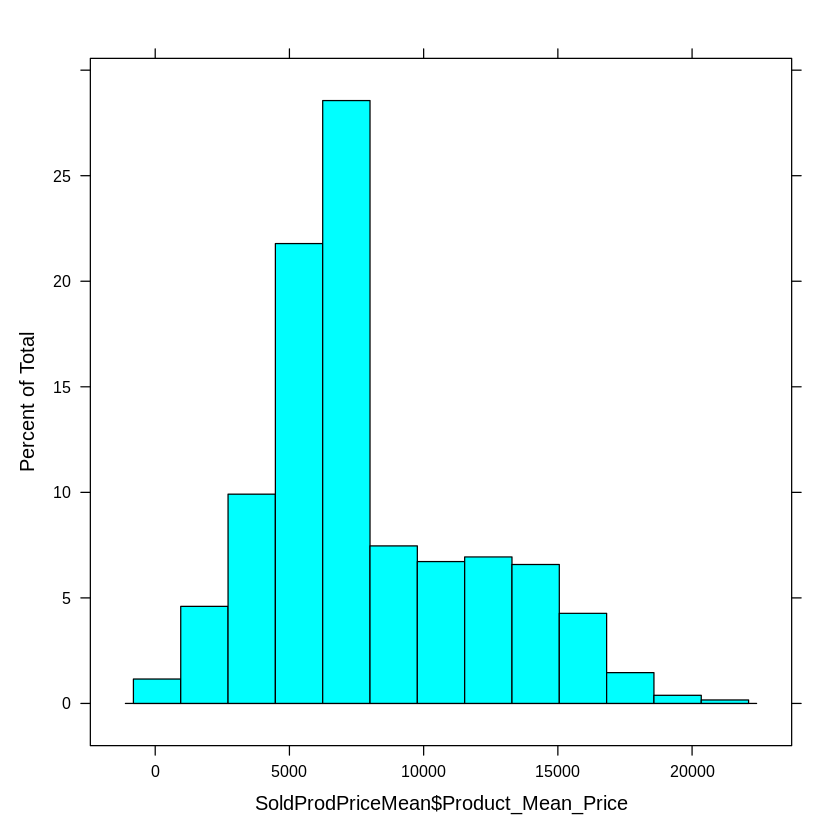

In [52]:
#distribution of Product Mean Price
histogram(SoldProdPriceMean$Product_Mean_Price)

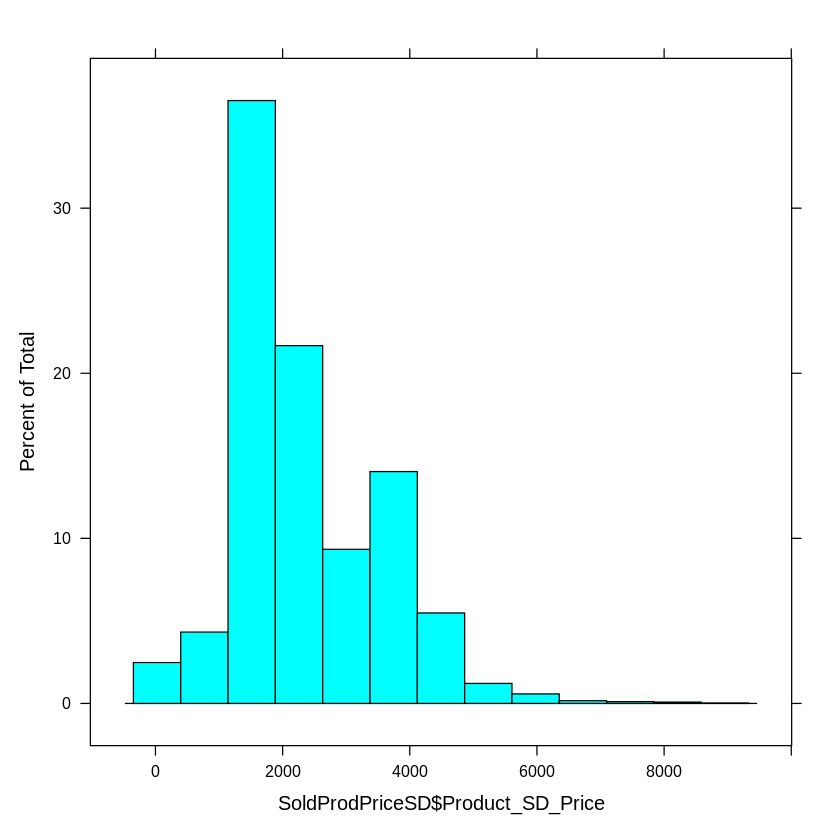

In [53]:
histogram(SoldProdPriceSD$Product_SD_Price)

## Correlation Matrix

In [54]:
corr_train <- df
corr_train$User_ID <- as.numeric(corr_train$User_ID)
corr_train$User_Purchase_Count <- as.numeric(corr_train$User_Purchase_Count)
corr_train$Product_ID <- as.numeric(corr_train$Product_ID)

corr_train$Gender <- as.numeric(ifelse(corr_train$Gender=="Male", 1, 0))

corr_train$Age <- as.numeric(ifelse(corr_train$Age=='0-17', 17, ifelse(corr_train$Age=='18-25', 25, ifelse(corr_train$Age=='26-35', 35, ifelse(corr_train$Age=='36-45', 45, ifelse(corr_train$Age=='46-50', 50, ifelse(corr_train$Age=='51-55', 55, 65)))))))

corr_train$Marital_Status <- as.numeric(ifelse(corr_train$Marital_Status=="Married", '1', '0'))

corr_train$Occupation <- as.numeric(corr_train$Occupation)

corr_train$City_Category <- as.numeric(ifelse(corr_train$City_Category=='A', 1, ifelse(corr_train$City_Category=='B', 2, 3)))

corr_train$Stay_In_Current_City_Years <- as.numeric(ifelse(corr_train$Stay_In_Current_City_Years=='4+', 6, corr_train$Stay_In_Current_City_Years))

corr_train$Total_Spending <- as.numeric(corr_train$Total_Spending)
corr_train$Avg_Spending_on_each_Product <- as.numeric(corr_train$Avg_Spending_on_each_Product)


#target Variable 
Y <- as.numeric(corr_train$Purchase)
corr_train$Product_Category_2<-NULL
corr_train$Product_Category_3<-NULL
cor(corr_train)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,User_Purchase_Count,Total_Spending,Avg_Spending_on_each_Product
User_ID,1.000000000,-0.017862126,-0.033463608,0.039035701,-0.023972390,0.022879924,-0.0298644275,0.0204781091,0.003812217,0.0047299777,-0.0325402624,-0.0285934043,0.014662220
Product_ID,-0.017862126,1.000000000,0.015915576,0.023755048,0.007423922,0.007031871,-0.0029239753,0.0116212908,0.074716650,-0.1093448731,-0.0015440086,-0.0027611666,-0.018224045
Gender,-0.033463608,0.015915576,1.000000000,-0.002028321,0.117290980,-0.004514742,0.0183225437,-0.0116031563,-0.045594243,0.0603456844,0.0735169235,0.1084090320,0.187176454
Age,0.039035701,0.023755048,-0.002028321,1.000000000,0.097411131,0.113391891,-0.0004099410,0.3049821286,0.060831017,0.0159315625,-0.0447222270,-0.0371213730,0.049409078
Occupation,-0.023972390,0.007423922,0.117290980,0.097411131,1.000000000,0.034478741,0.0279090106,0.0242799611,-0.007617560,0.0208326169,-0.0029285442,0.0039334520,0.064616249
City_Category,0.022879924,0.007031871,-0.004514742,0.113391891,0.034478741,1.000000000,0.0192704087,0.0397904678,-0.014364067,0.0619141705,-0.5221977432,-0.5027000436,0.192035487
Stay_In_Current_City_Years,-0.029864427,-0.002923975,0.018322544,-0.000409941,0.027909011,0.019270409,1.0000000000,-0.0121174909,-0.001942145,0.0046921202,0.0012974948,0.0001504608,0.014557858
Marital_Status,0.020478109,0.011621291,-0.011603156,0.304982129,0.024279961,0.039790468,-0.0121174909,1.0000000000,0.019887854,-0.0004633764,0.0006783065,-0.0038747839,-0.001435054
Product_Category_1,0.003812217,0.074716650,-0.045594243,0.060831017,-0.007617560,-0.014364067,-0.0019421451,0.0198878542,1.000000000,-0.3437033459,0.0177479202,0.0035240193,-0.112920374
Purchase,0.004729978,-0.109344873,0.060345684,0.015931562,0.020832617,0.061914170,0.0046921202,-0.0004633764,-0.343703346,1.0000000000,-0.0903558827,-0.0384390394,0.322414783


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.90 loaded



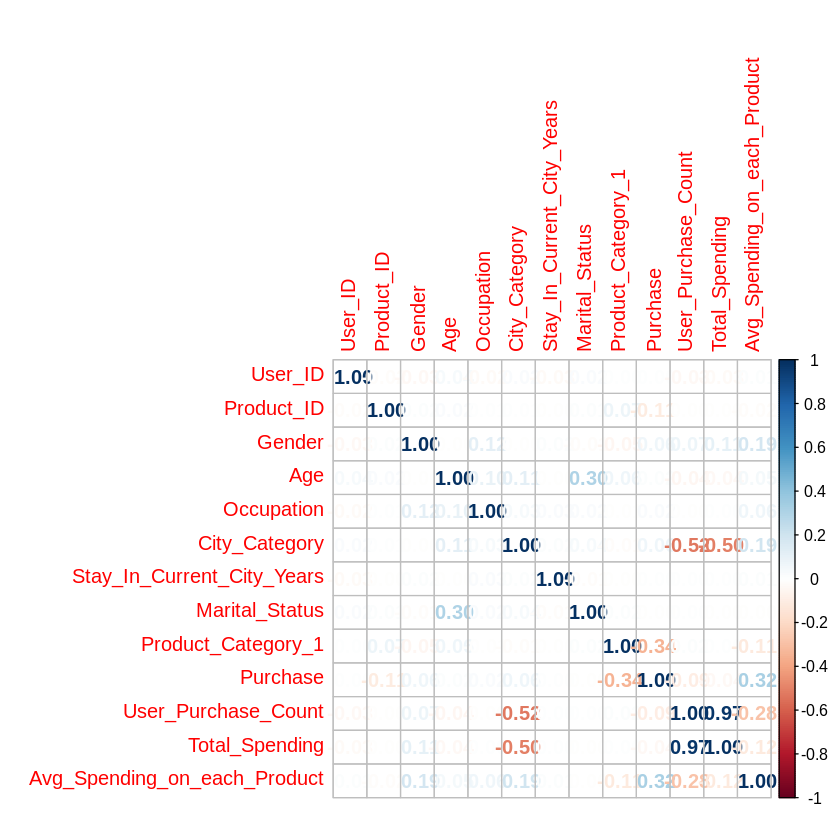

In [60]:
install.packages('corrplot')
library(corrplot)

C<- cor(corr_train)
corrplot(C, method="number")